## EDA Student Performance Indicator

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 3) Dataset Information
- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

# Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [4]:
df['total score'] = df['math score']+df['reading score']+df['writing score']

In [5]:
df['average score'] = df['total score']/3

### Adding two more columns with name of "Total score" and "Average Score"

In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
total score                    0
average score                  0
dtype: int64

In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
total score                    0
average score                  0
dtype: int64

### In the dataset there is no null an NA values

In [7]:
df.duplicated().sum()

0

### Dataset has no duplicate values

In [8]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                       int64
reading score                    int64
writing score                    int64
total score                      int64
average score                  float64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   total score                  1000 non-null   int64  
 9   average score                1000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 78.2+ KB


### Checking of datatypes and info are done.

In [10]:
# number of unique value in each column
df.nunique()

gender                           2
race/ethnicity                   5
parental level of education      6
lunch                            2
test preparation course          2
math score                      81
reading score                   72
writing score                   77
total score                    194
average score                  194
dtype: int64

### Checking the number of Unique values done 

In [12]:
df.describe()

,math score,reading score,writing score,total score,average score
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770667
std,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.333333
50%,66.00000,70.000000,69.000000,205.000000,68.333333
75%,77.00000,79.000000,79.000000,233.000000,77.666667
max,100.00000,100.000000,100.000000,300.000000,100.000000


## In the stats of dataset we found that 
- Mean are between 66 to 69
- STD are between 14.60 to 15.19
- Min in maths score is 0 and other have 17 and 10.
- Max is same with 100 .


In [13]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<AxesSubplot: xlabel='math score', ylabel='Count'>

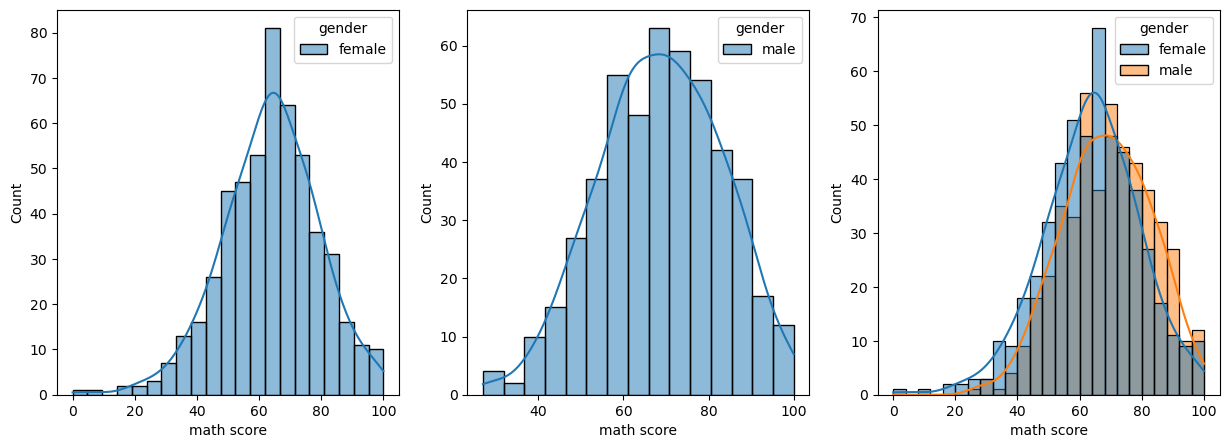

In [17]:
plt.subplots(1,3,figsize=(15,5))
plt.subplot(131)
sns.histplot(x=df['math score'],kde=True,hue=df[df['gender']=='female']['gender'])
plt.subplot(132)
sns.histplot(x=df['math score'],kde=True,hue=df[df['gender']=='male']['gender'])
plt.subplot(133)
sns.histplot(hue=df['gender'],x=df['math score'],kde=True)

### Insights
- Females are Higher and lower scorrer in Maths

<AxesSubplot: xlabel='reading score', ylabel='Count'>

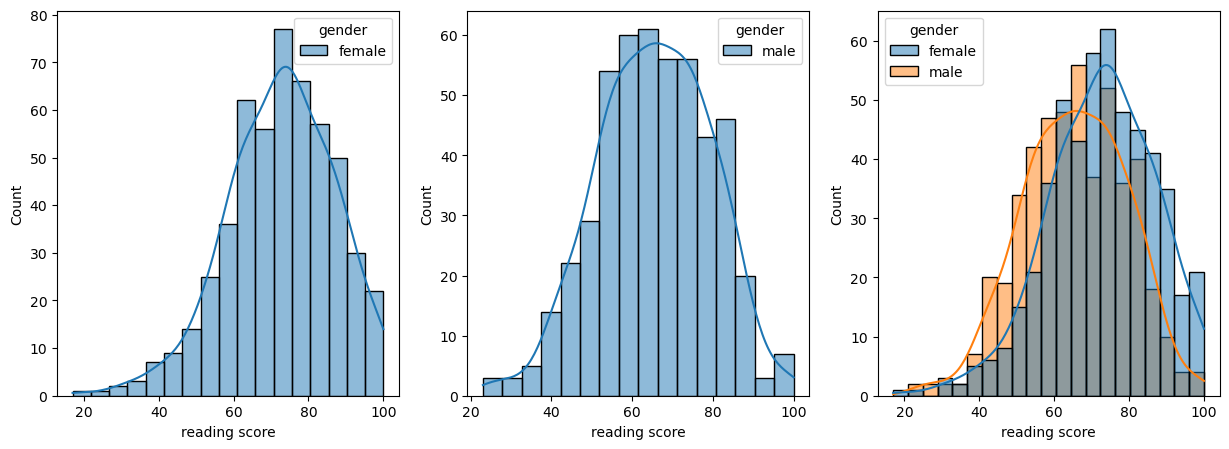

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.histplot(x=df['reading score'],kde=True,hue=df[df['gender']=='female']['gender'])
plt.subplot(132)
sns.histplot(x=df['reading score'],kde=True,hue=df[df['gender']=='male']['gender'])
plt.subplot(133)
sns.histplot(hue=df['gender'],x=df['reading score'],kde=True)

### Insights
- Females are Higher and lower scorrer in reading.

<AxesSubplot: xlabel='writing score', ylabel='Count'>

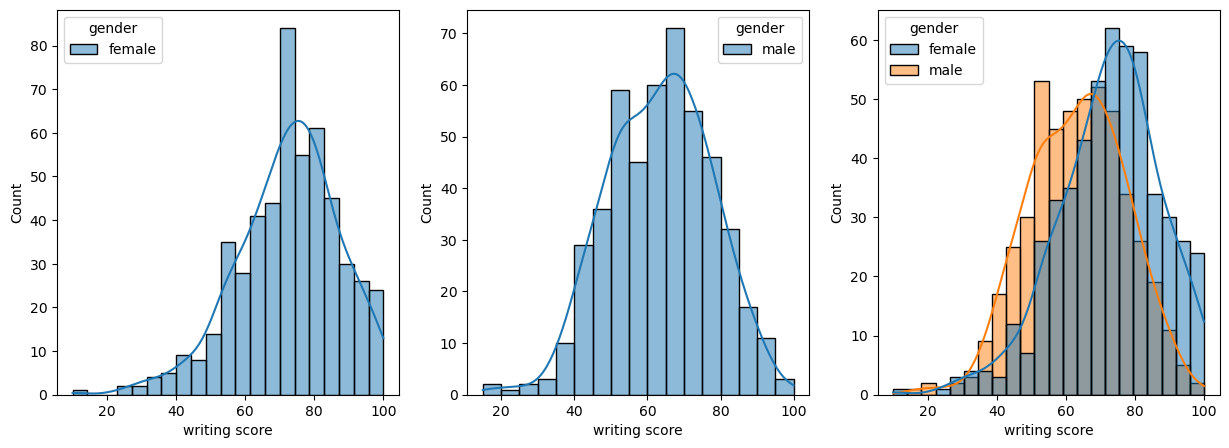

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.histplot(x=df['writing score'],kde=True,hue=df[df['gender']=='female']['gender'])
plt.subplot(132)
sns.histplot(x=df['writing score'],kde=True,hue=df[df['gender']=='male']['gender'])
plt.subplot(133)
sns.histplot(hue=df['gender'],x=df['writing score'],kde=True)

### Insights
- Females and Males both are under performing in Writing.

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.histplot(data=df[df['gender']=='female'],x=df['total score'],kde=True,hue=df[])

<AxesSubplot: xlabel='math score', ylabel='Count'>

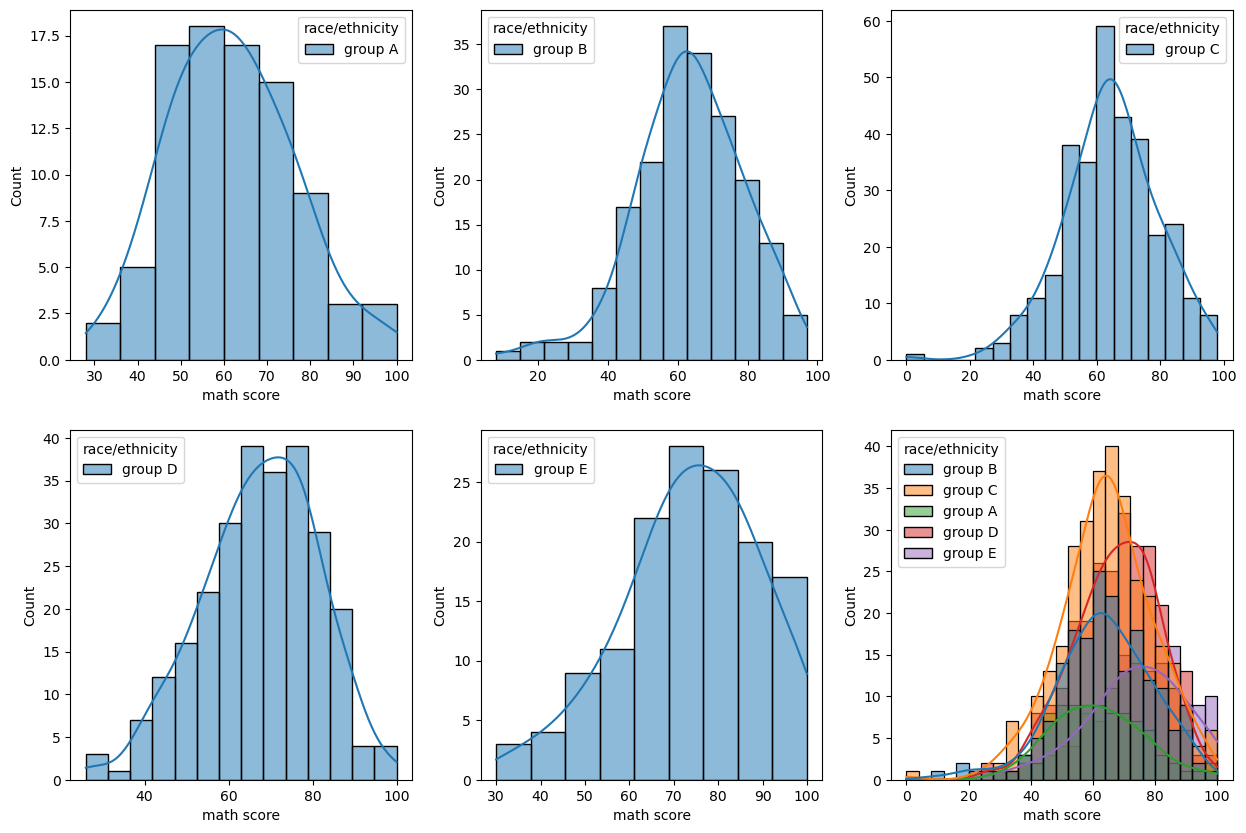

In [44]:
plt.figure(figsize=(15,10))
plt.subplot(231)
sns.histplot(x=df['math score'],kde=True,hue=df[df['race/ethnicity']=='group A']['race/ethnicity'])
plt.subplot(232)
sns.histplot(x=df['math score'],kde=True,hue=df[df['race/ethnicity']=='group B']['race/ethnicity'])
plt.subplot(233)
sns.histplot(x=df['math score'],kde=True,hue=df[df['race/ethnicity']=='group C']['race/ethnicity'])
plt.subplot(234)
sns.histplot(x=df['math score'],kde=True,hue=df[df['race/ethnicity']=='group D']['race/ethnicity'])
plt.subplot(235)
sns.histplot(x=df['math score'],kde=True,hue=df[df['race/ethnicity']=='group E']['race/ethnicity'])
plt.subplot(236)
sns.histplot(hue=df['race/ethnicity'],x=df['math score'],kde=True)

### Insights
- Students of Group B and Group C are score lowest marks in maths.

<AxesSubplot: xlabel='reading score', ylabel='Count'>

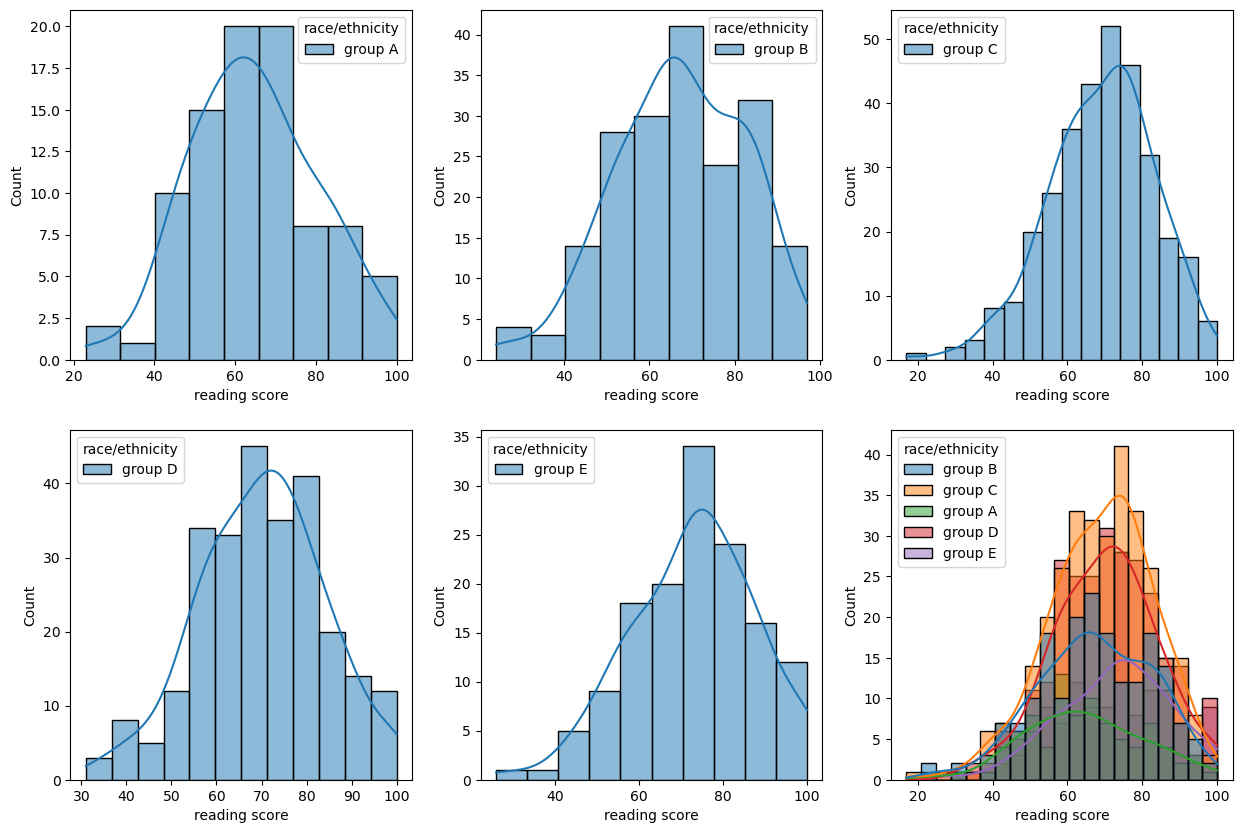

In [46]:
plt.figure(figsize=(15,10))
plt.subplot(231)
sns.histplot(x=df['reading score'],kde=True,hue=df[df['race/ethnicity']=='group A']['race/ethnicity'])
plt.subplot(232)
sns.histplot(x=df['reading score'],kde=True,hue=df[df['race/ethnicity']=='group B']['race/ethnicity'])
plt.subplot(233)
sns.histplot(x=df['reading score'],kde=True,hue=df[df['race/ethnicity']=='group C']['race/ethnicity'])
plt.subplot(234)
sns.histplot(x=df['reading score'],kde=True,hue=df[df['race/ethnicity']=='group D']['race/ethnicity'])
plt.subplot(235)
sns.histplot(x=df['reading score'],kde=True,hue=df[df['race/ethnicity']=='group E']['race/ethnicity'])
plt.subplot(236)
sns.histplot(hue=df['race/ethnicity'],x=df['reading score'],kde=True)

### Insights
- Students of Group B and Group C are score lowest marks in reading.

<AxesSubplot: xlabel='writing score', ylabel='Count'>

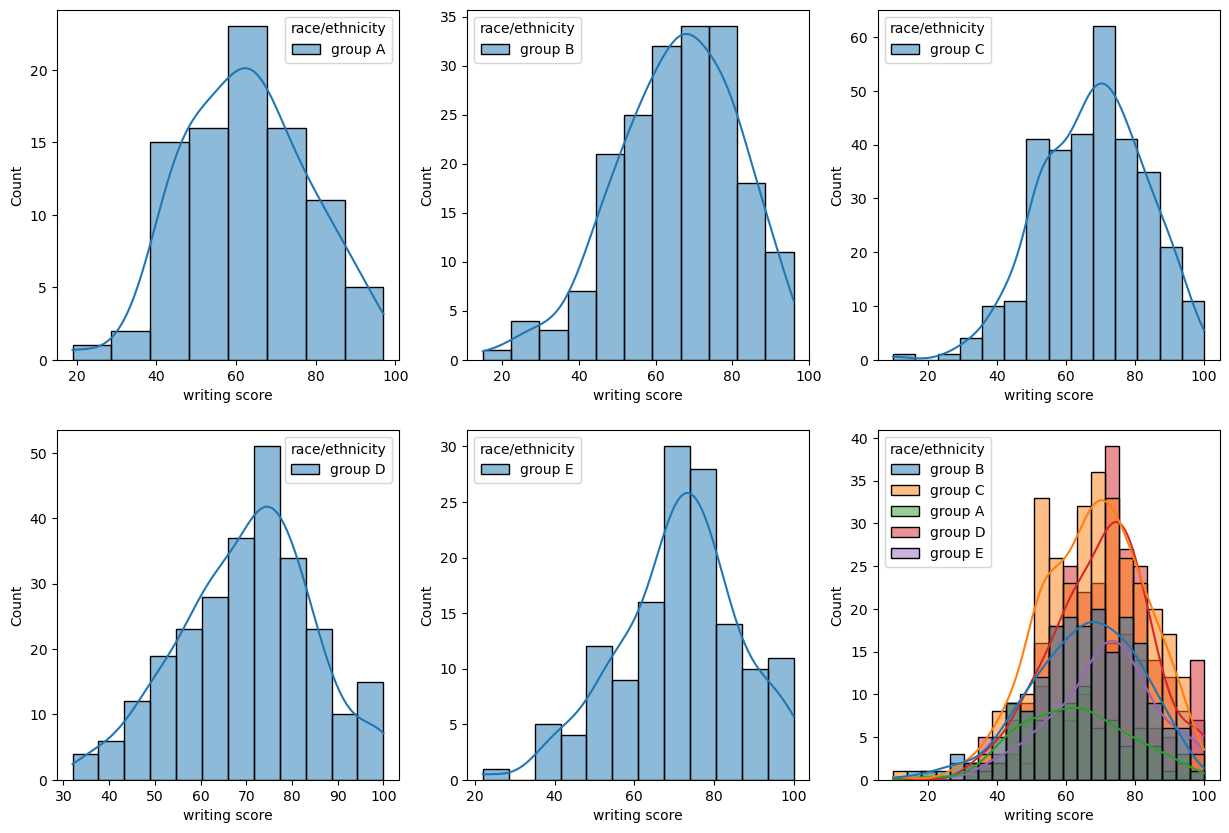

In [47]:
plt.figure(figsize=(15,10))
plt.subplot(231)
sns.histplot(x=df['writing score'],kde=True,hue=df[df['race/ethnicity']=='group A']['race/ethnicity'])
plt.subplot(232)
sns.histplot(x=df['writing score'],kde=True,hue=df[df['race/ethnicity']=='group B']['race/ethnicity'])
plt.subplot(233)
sns.histplot(x=df['writing score'],kde=True,hue=df[df['race/ethnicity']=='group C']['race/ethnicity'])
plt.subplot(234)
sns.histplot(x=df['writing score'],kde=True,hue=df[df['race/ethnicity']=='group D']['race/ethnicity'])
plt.subplot(235)
sns.histplot(x=df['writing score'],kde=True,hue=df[df['race/ethnicity']=='group E']['race/ethnicity'])
plt.subplot(236)
sns.histplot(hue=df['race/ethnicity'],x=df['writing score'],kde=True)

### Insights
- Students of Group D are holding good marks in reading.

<AxesSubplot: xlabel='total score', ylabel='Count'>

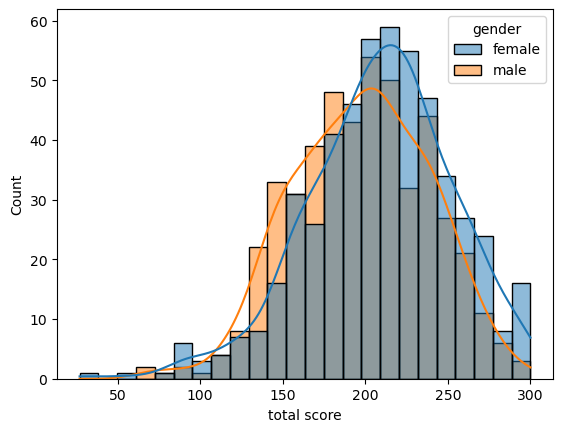

In [17]:
sns.histplot(x=df['total score'],kde=True,hue=df['gender'])

### Insights
- Female Students perform well than male students.

<AxesSubplot: xlabel='parental level of education', ylabel='Count'>

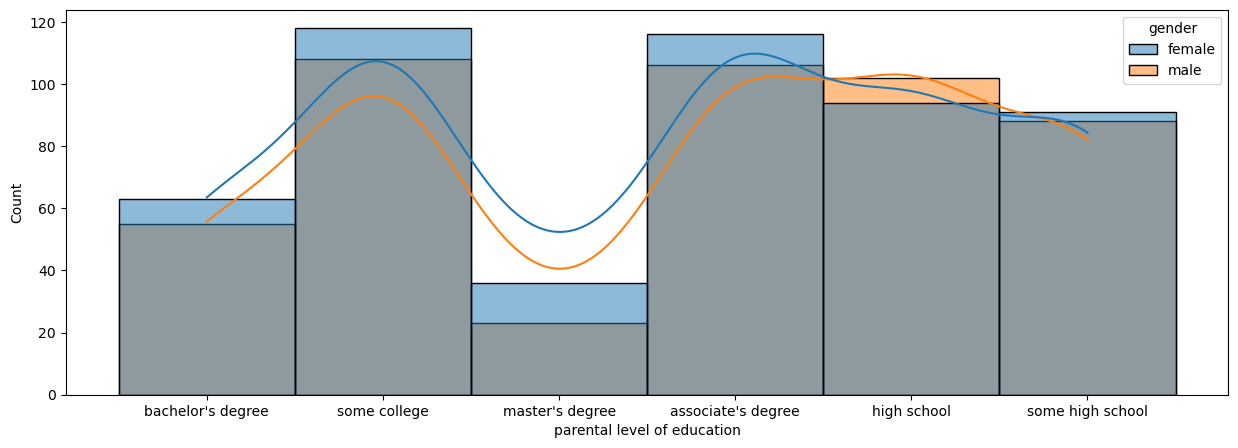

In [19]:
plt.figure(figsize=(15,5))
sns.histplot(x=df['parental level of education'],hue=df['gender'],kde=True)

<AxesSubplot: xlabel='parental level of education', ylabel='Count'>

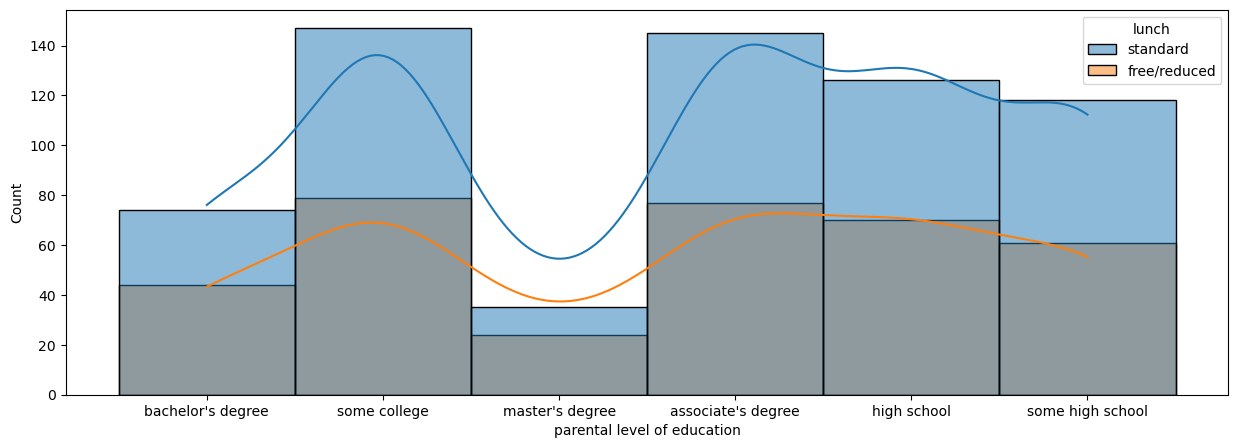

In [20]:
plt.figure(figsize=(15,5))
sns.histplot(x=df['parental level of education'],hue=df['lunch'],kde=True)